In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font',family = 'MalGun Gothic')
mpl.rc('axes',unicode_minus = False)

# Gradient Boosting

* 부스팅 기법 : 여러개의 약한 학습기를 순차적으로 학습시켜 잘못 예측한 데이터에 가중치를 부여해 오류를 개선해 나가는 기법이다.
* 가중치의 업데이트로 경사하강법을 이용한다.

In [3]:
# GBM 파라미터 알아보기
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model

'''
중요한 파라미터

learning_rate : 경사하강법을 이용할 때 결과에 큰 영행을 미치는 파라미터이다.
learning_rate가 크면 최소값을 찾지 못하고 지나칠 수 있어 모델 성능이 나빠질 수 있다.
learning_rate가 작으면 최소값을 찾기까지 오랜 시간이 걸리게 된다.
'''

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

* cancer 데이터를 사용해 Gradient Boosting 모델 적용해보기

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# 데이터 불러오기
cancer = load_breast_cancer()

# 데이터 나누기
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)

# 모델 생성 및 학습하기
gb = GradientBoostingClassifier(random_state=0) # 위에서의 random_state는 분할때의 랜덤 시드값을 정해준 것이고 이 코드에서의 
                                                # random_state는 부스팅 모델을 사용할 때 랜덤으로 생성되는 약한학습기들의 시드값을 정해준 것이다.
gb.fit(X_train,y_train)

# 훈련과 테스트 데이터 정확도 확인해보기
print('훈련 정확도 : {:.3f}'.format(gb.score(X_train,y_train)))
print('테스트 정확도 : {:.3f}'.format(gb.score(X_test,y_test)))


# 교차 검증을 사용하여 정확도 측정하기
# 여기서는 전체 데이터를 가지고 교차검증을 실시하였다. 
X = cancer.data
y = cancer.target

print('cv= 10일 때의 교차검증 평균 정확도 : {:.3f} '.format(cross_val_score(gb,X,y,cv=10).mean()))
print('cv= 5일 때의 교차검증 평균 정확도 : {:.3f} '.format(cross_val_score(gb,X,y,cv=5).mean()))

########################################
# 훈련 데이터의 정확도가 100%가 나온걸로 보아 테스트 데이터 정확도와 비교해 보았을 때 과대적합 되었다는 사실을 알 수 있다.
# boosting 기법이 오차를 계속 수정해 나가는 기법이여서 모델이 훈련 데이터에 너무 적합된 것 같다.
# 과대적합을 막는 방법은 가지치기를 통해 깊이를 조절하거나 오차를 수정하는 학습률을 조정하는 방법이 있다.

# 교차검증 : 전체 데이터를 cv의 개수만큼 분할 한뒤 한쪽은 훈련데이터, 다른쪽은 테스트데이터로 만들어 모델을 평가하는 방법이다.
# 교차검증을 실시하면 테스트 데이터를 골고루 반영할 수 있어 일반화된 평가 점수를 알 수 있게 된다.

훈련 정확도 : 1.000
테스트 정확도 : 0.965
cv= 10일 때의 교차검증 평균 정확도 : 0.961 
cv= 5일 때의 교차검증 평균 정확도 : 0.962 


In [8]:
# 파라미터를 조정해서 다시 모델에 적용시켜보기

def adjust_param(max_depth,learning_rate):
    
    # 모델 생성 및 학습
    gb = GradientBoostingClassifier(random_state=0,max_depth=max_depth,learning_rate=learning_rate) 
    gb.fit(X_train,y_train)
    
    # 훈련과 테스트 데이터 정확도 확인해보기
    print('훈련 정확도 : {:.3f}'.format(gb.score(X_train,y_train)))
    print('테스트 정확도 : {:.3f}'.format(gb.score(X_test,y_test)))


    # 교차 검증을 사용하여 정확도 측정하기
    # 여기서는 전체 데이터를 가지고 교차검증을 실시하였다. 
    print('cv= 10일 때의 교차검증 평균 정확도 : {:.3f} '.format(cross_val_score(gb,X,y,cv=10).mean()))
    print('cv= 5일 때의 교차검증 평균 정확도 : {:.3f} '.format(cross_val_score(gb,X,y,cv=5).mean()))

# max_depth와 learning_rate 파라미터 설정하기
max_depth = [1,2,4] # max_depth = 3은 default값이기 때문에 제외한다.
learning_rate = [0.01,0.1]

# 함수를 적용하여 결과 확인해보기
for depth in max_depth:
    for lr in learning_rate:
        print('깊이 : {} , 학습률 : {}'.format(depth,lr))
        adjust_param(depth,lr)
        
#####################################
# 결과를 확인해보면 
# 깊이가 깊어질수록 훈련데이터의 정확도가 100%에 가까워 과대적합이 된다는 것을 확인할 수 있다.
# 학습률이 커질수록 훈련데이터의 정확도가 높아진다는 것을 확인 할 수 있다.
# 결과를 확인해 보았을 때 설정된 파라미터 중에서는 깊이 : 1, 학습률 : 0.1 또는 깊이 : 2 , 학습률 : 0.01이 모델 성능이 좋은 것 같다.

깊이 : 1 , 학습률 : 0.01
훈련 정확도 : 0.927
테스트 정확도 : 0.958
cv= 10일 때의 교차검증 평균 정확도 : 0.926 
cv= 5일 때의 교차검증 평균 정확도 : 0.925 
깊이 : 1 , 학습률 : 0.1
훈련 정확도 : 0.991
테스트 정확도 : 0.972
cv= 10일 때의 교차검증 평균 정확도 : 0.961 
cv= 5일 때의 교차검증 평균 정확도 : 0.963 
깊이 : 2 , 학습률 : 0.01
훈련 정확도 : 0.974
테스트 정확도 : 0.965
cv= 10일 때의 교차검증 평균 정확도 : 0.941 
cv= 5일 때의 교차검증 평균 정확도 : 0.942 
깊이 : 2 , 학습률 : 0.1
훈련 정확도 : 1.000
테스트 정확도 : 0.972
cv= 10일 때의 교차검증 평균 정확도 : 0.958 
cv= 5일 때의 교차검증 평균 정확도 : 0.953 
깊이 : 4 , 학습률 : 0.01
훈련 정확도 : 0.995
테스트 정확도 : 0.923
cv= 10일 때의 교차검증 평균 정확도 : 0.951 
cv= 5일 때의 교차검증 평균 정확도 : 0.946 
깊이 : 4 , 학습률 : 0.1
훈련 정확도 : 1.000
테스트 정확도 : 0.958
cv= 10일 때의 교차검증 평균 정확도 : 0.963 
cv= 5일 때의 교차검증 평균 정확도 : 0.956 


C:\Users\174518\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


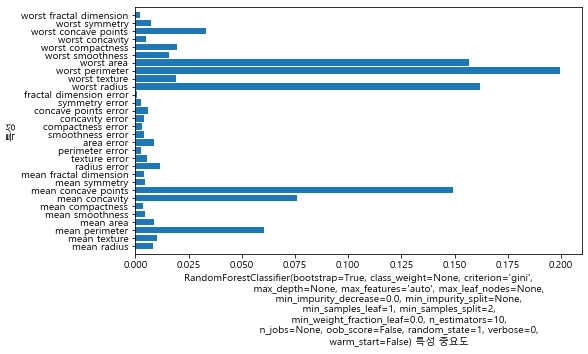

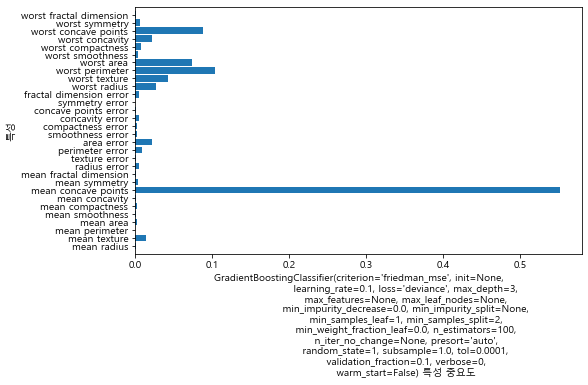

In [27]:
# random_forest와 gradient boosting의 변수 중요도 확인해보기
from sklearn.ensemble import RandomForestClassifier

# 랜덤포레스트 모델 적용
rf = RandomForestClassifier(random_state=1).fit(X_train,y_train)

# 그레디언트 부스팅 모델 적용
gb = GradientBoostingClassifier(random_state=1).fit(X_train,y_train)

# 변수의 중요도 시각화 하기

# 연습
# plt.plot(rf.feature_importances_)
# plt.xticks(np.arange(cancer.data.shape[1]),cancer.feature_names,rotation='90')

def plot_importance(model,setting):
    
    n_features = cancer.data.shape[1] # 특성 개수 세기
    plt.figure(figsize=(8,10))
    # subplot 지정
    plt.subplot(setting)
    plt.barh(range(n_features),model.feature_importances_,align='center') # 가로막대를 그리는 함수
    plt.yticks(np.arange(n_features),cancer.feature_names) # y축에 이름 부여하기
    plt.xlabel('{} 특성 중요도'.format(model)) # x축 제목 설정
    plt.ylabel('특성') # y축 제목 설정
    plt.ylim(-1,n_features) # y축 범위 설정



plot_importance(rf,211)
plot_importance(gb,212)

####################################
# xticks 또는 yticks를 사용해 각 축의 값들을 특성의 이름으로 변경할 수 있고, rotation이라는 option을 통해 이름의 위치를 조정 가능하다.
# 랜덤 포레스트와 달리 그레디언트 부스팅은 일부 특성들이 제외되고 있는 것을 확인 할 수 있다.

In [ ]:
# 랜덤 포레스트와 마찬가지로 희소한 고차원 데이터에서는 잘 작동되지 않는다.
# 스케일링에 민감하지 않다.
# 보통은 random_forest보다 성능이 좋다.

# 배깅

* 랜덤포레스트는 배깅에 속한다.
* 배깅은 bootstrap방식으로 샘플들을 무작위 복원 반복 추출하여 각각의 모델에 학습시켜 결과를 aggregation(집계) 한다.

In [33]:
# cancer 데이터에 배깅 사용해보기 ---> 배깅 방식으로 로지스틱 모델 100개 훈련시켜 앙상블시켜보기
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

# 데이터 불러오기
cancer = load_breast_cancer()

# 데이터 나누기
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state= 0)

# 모델 적용해보기 --> 로지스틱 회귀모델을 100개 생성하고 oob(훈련 데이터에 포함되지 않은 샘플들) 평가를 실시한다.
bagging = BaggingClassifier(LogisticRegression(solver='liblinear'),n_estimators=100,
                           oob_score=True,random_state=42)
bagging.fit(X_train,y_train)

# 정확도 평가
print('훈련 정확도 : {:.3f}'.format(bagging.score(X_train,y_train)))
print('테스트 정확도 : {:.3f}'.format(bagging.score(X_test,y_test)))
print('OOB 정확도 : {:.3f}'.format(bagging.oob_score_))

#############################
# 훈련 정확도와 테스트 정확도가 비슷한걸로 보아 모델이 괜찮다고 판단 할 수 있다.
# 물론 분류문제에서는 정확도만 가지고 모델을 평가하면 오류를 범하기가 쉽다 --> 오차행렬,f1,auc점수등을 추가로 평가해야 한다.

훈련 정확도 : 0.962
테스트 정확도 : 0.958
OOB 정확도 : 0.948


# 엑스트라 트리

* 랜덤포레스트와 비슷하지만 다른점이 존재
* 랜덤포레스트는 샘플들을 bootstrap 방식으로 추출하지만 엑스트라 트리는 bootstrap 샘플링은 사용하지 않고 후보 특성을 무작위로 추출한다.
* 예측 방식은 랜덤포레스트와 동일하다.

# 에다부스트

* 부스팅의 기법중 하나이다.
* 그레디언트 부스팅은 이전 트리의 오차를 보완하는 방식이지만 에다부스트는 이전 모델에서 잘못 분류한 샘플들에 가중치를 부여한다.

# 앙상블 모델

* 앙상블 모델에는 hard voting과 soft voting방식이 존재한다.
* hard voting은 투표하듯이 과반수의 결과로 분류가 결정된다.
* soft voting은 각 클래스의 확률을 구하고 그 확률들의 평균을 계산해 높은 확률을 가진 클래스로 분류한다.

In [9]:
# cancer데이터를 이용해 hard voting 해보기
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# hard voting을 사용할 때 로지스틱 회귀모델, 랜덤포레스트, 결정트리를 사용한다.

# 데이터 준비
cancer = load_breast_cancer()

# 데이터 나누기
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state = 0)

# 사용할 모델 생성
logisitic = LogisticRegression()
rf = RandomForestClassifier()
tree = DecisionTreeClassifier()

voting_clf = VotingClassifier(
             estimators=[('lr',logisitic),('rf',rf),('dt',tree)], voting='hard')

# 학습/예측/평가
for clf in (logisitic,rf,tree,voting_clf):
    # 모델 학습 및 예측
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,np.around(accuracy_score(y_test,y_pred),3))

# 경고 메세지 무시 --> 버전에 따른 경고 메세지여서 무시한다.
import warnings
warnings.filterwarnings("ignore")

########################################
# 모델의 정확도를 확인해 보았을 때 각각의 모델보다 보팅방식을 이용한 정확도가 더 높다는 사실을 알 수 있다.
# 보팅은 여러모델들의 결과를 종합하여 하나의 결과로 도출하기 때문에 하나의 모델보다는 더 일반화 되기 싶다는 것을 알 수 있다.

LogisticRegression 0.958
RandomForestClassifier 0.944
DecisionTreeClassifier 0.888
VotingClassifier 0.965


# OOB 평가

* 배깅에서는 bootstrap을 이용해 샘플을 추출할 때 사용되지 않는 데이터가 존재하게 되는데 이 데이터를 oob라고 한다.
* 데이터의 수가 적을때는 oob를 테스트 데이터로 간주하고 평가를 시행할 수 있다.

In [11]:
# 위에서 oob 평가점수를 한번 구해보았지만, 다시 한번 더 구해보자
from sklearn.ensemble import BaggingClassifier

# 결정트리를 500개를 만들어 모델을 평가한다.
bag_clf = BaggingClassifier(
            DecisionTreeClassifier(),n_estimators=500,bootstrap=True,random_state=40,oob_score=True)
bag_clf.fit(X_train,y_train)

# 예측
pred = bag_clf.predict(X_test)

# oob 점수 출력
print('oob score : {:.3f}'.format(bag_clf.oob_score_))
# 분류기 점수 출력
print('분류기 정확도 : {:.3f}'.format(accuracy_score(y_test,pred)))

####################
# oob점수와 분류기 점수는 같지는 않지만 거의 비슷하다는 것을 확인할 수 있다.

oob score : 0.951
분류기 정확도 : 0.972


# XGboost

* 일반적으로 분류문제에 있어 다른 머신러닝보다 뛰어난 예측성능을 가진다.
* xgboost는 아나콘다에서 따로 설치를 해주어야 한다.

In [5]:
import xgboost
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# cancer 데이터 사용하기
cancer = load_breast_cancer()

# 데이터 나누기
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state = 0)

# 모델 생성 및 학습
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

# 예측
pred = xgb.predict(X_test)

# 정확도 출력
print('정확도 : {:.3f}'.format(accuracy_score(y_test,pred)))

# 오차행렬
print('오차행렬 : \n',confusion_matrix(y_test,pred))

#####################
# 다른 분류기보다 저 좋은 성능을 가지고 있음을 확인할 수 있다.
# 3개를 잘못 오분류하였고, 전체적으로는 좋은 성능을 가지고 있음을 확인할 수 있다.

정확도 : 0.979
오차행렬 : 
 [[51  2]
 [ 1 89]]


# SVM

* svm은 분류문제와 회귀문제를 모두 해결할 수 있다. 
* 분류문제에서는 svc , 회귀문제에서는 svr를 사용한다.
* svc 분류기의 목적은 마진을 크게 하는 것이다. 
* 폭이 넓어지면 새로운 데이터가 들어왔을 때도 일반화가 잘 되기 때문이다.
* 선형으로는 분류가 되지 않는 비선형 문제의 경우에는 특성을 제곱하여 차원을 증가시켜 선형의 문제로 바꾸거나
* 커널트릭을 이용해 해결하는 방법이 있다.
* 커널트릭은 새로운 특성을 추가하지 않았지만 마치 추가한것과 같은 결과를 내는 기법이다.

C:\Users\174518\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


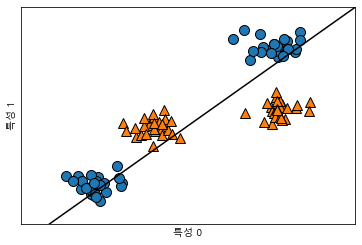

In [3]:
# 선형 svc 살펴보기 --> bolb 데이터 사용하기
from sklearn.svm import LinearSVC
import mglearn
from sklearn.datasets import make_blobs

# 데이터 생성하기
X,y = make_blobs(centers=4,random_state=8)
y = y%2

# 모델 생성 및 학습
linear_svc = LinearSVC().fit(X,y)

# mglearn에 저장되어 있는 함수 불러오기
mglearn.plots.plot_2d_separator(linear_svc,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.show()
#######################
# 그림을 확인해보면 그림에서 그려진 선분은 각 클래스를 하나의 선분으로 잘 분류하고 있지 않는 것을 확인할 수 있다.
# 이런 데이터를 비선형 문제라고 한다.
# 비선형 문제를 해결하기 위해서는 특성들의 제곱을 추가로 생성해 저차원을 고차원으로 변형시킴으로서 선형문제로 변경시키는 것이다.

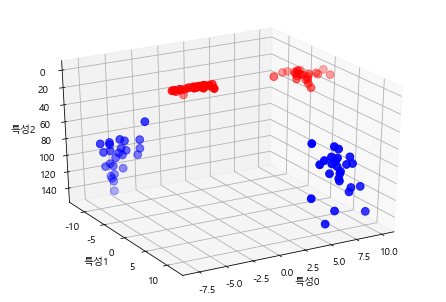

In [16]:
# 비선형 문제를 해결하기 위해 두번째 특성을 제곱하여 추가한다.
from mpl_toolkits.mplot3d import Axes3D , axes3d

# 두번째 특성을 제곱하여 추가한다.
X_new = np.hstack([X,X[:,1:]**2]) # hstack은 배열을 왼쪽에서 오른쪽으로 붙이는 함수이다. 

# 그래프 객체 생성
figure = plt.figure()

# 3차원 그래프 만들기
ax = Axes3D(figure,elev = -152) # elev는 시야각을 의미하고,  azim은 z축 각도 의미한다.

# y데이터에서 0이면 ture , 0이 아니면 false 반환하기
mask = y ==0 

# y가 ture일때와 false일때의 인덱스를 X_new에 적용하고 산점도를 그린다.
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',s=60) # y가 true일때의 인덱스값들을 X_new에 적용
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',s=60) # y가 false일때의 인덱스값들을 X_new에 적용

# 각 축의 이름 지정
ax.set_xlabel('특성0')
ax.set_ylabel('특성1')
ax.set_zlabel('특성2')
plt.show()

#########################################
# 2차원일때는 하나의 선형식으로는 각 클래스를 분류할 수 없었지만, 특성을 늘려 3차원으로 변경시켰을 때에는 분류가 가능해짐을 알 수 있다.

C:\Users\174518\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


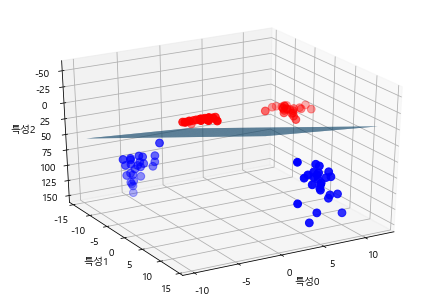

In [30]:
# 위에서 만든 3차원 공간에서 선형 결정 경계를 추가해보자
from sklearn.svm import LinearSVC

# 모델 생성 및 학습
linear_svc = LinearSVC().fit(X_new,y)

# 계수와 절편 저장 --> ravel()  : 다차원 배열을 1차원 배열로 만들어준다.
coef, intercept = linear_svc.coef_.ravel(),linear_svc.intercept_

# 결정경계 그리기
figure = plt.figure()
ax = Axes3D(figure,elev = -152) # 3차원 생성
xx = np.linspace(X_new[:,0].min()-2,X_new[:,0].max()+2,50) # 첫번째 특성의 최대값과 최솟값을 구해 50단위를 구한다.
yy = np.linspace(X_new[:,1].min()-2,X_new[:,1].max()+2,50) # 두번째 특성의 최대값과 최솟값을 구해 50단위를 구한다.

XX,YY =  np.meshgrid(xx,yy) # 각 점들의 그리드 좌표를 출력한다.
ZZ = (coef[0]*XX + coef[1] * YY + intercept) / -coef[2] # 회귀식에서의 각 점들을 저장

# 그래프 그리기
ax.plot_surface(XX,YY,ZZ) # 평면 그리기
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',s=60) # y가 true일때의 인덱스값들을 X_new에 적용
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',s=60) # y가 false일때의 인덱스값들을 X_new에 적용

# 각 축의 이름 지정
ax.set_xlabel('특성0')
ax.set_ylabel('특성1')
ax.set_zlabel('특성2')
plt.show()

#############################
# 선형svc 모델을 적용하여 각 클래스를 구분해주는 평면을 그렸는데 잘 분류하고 있는 모습을 볼 수 있다.

* svc 파라미터
* C -> 규제매개변수인데 C가 작을수록 규제가 커져서 특성들의 영향력이 작아진다.
* gamma -> 커널 폭을 의미하는데 gamma가 작을수록 넓은 커널 영역을 가진다.

* cancer 데이터에 svc 모델 적용해보기

In [33]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# 데이터 생성
cancer = load_breast_cancer()

# 데이터 나누기
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state = 0)

# 모델 생성 및 학습
svc = SVC(gamma='auto').fit(X_train,y_train)

# 정확도 평가
print('훈련 정확도 : {:.3f}'.format(svc.score(X_train,y_train)))
print('테스트 정확도 : {:.3f}'.format(svc.score(X_test,y_test)))

#############
# 훈련 정확도와 테스트 정확도가 차이가 많이 나는 것으로 보아 너무 훈련데이터에 과대적합 되었음을 알 수 있다.
# 이를 해결하기 위해서는 gamma 또는 C 규제를 강화하거나 스케일링 작업을 하여야 한다.

훈련 정확도 : 1.000
테스트 정확도 : 0.629


In [43]:
# 데이터 스케일링 작업을 한 후 모델 적용해보기
from sklearn.preprocessing import MinMaxScaler

# min-max scaler 객체 생성하기
scaling = MinMaxScaler()

# 스케일링 작업을 수행하기 --> test데이터에는 train 데이터에서 설정한 범위를 그대로 유지해야 하기 때문에 test 데이터는 transform만 실시
X_train_trans = scaling.fit_transform(X_train)
X_test_trans = scaling.transform(X_test)

# 모델 생성 및 학습
svc = SVC(gamma='auto').fit(X_train_trans,y_train)

# 모델 예측하기
pred = svc.predict(X_test_trans)

# 정확도 평가하기
print('훈련 정확도 : {:.3f}'.format(svc.score(X_train_trans,y_train)))
print('테스트 정확도 : {:.3f}'.format(svc.score(X_test_trans,y_test)))

#######################################
# min-max-scaler 방법을 사용해 데이터 전처리를 하고난 결과를 확인해보면 모델 성능이 훨씬 향상된것을 확인해 볼 수 있다.
# min-max-sclaer 스케일링을 할 때 주의할 점은 train 데이터에는 fit과 transform을 모두 해야하지만, test 데이터의 경우
# train 데이터에서 학습시켰던 범위가 그대로 유지되어야 하기 때문에 transform만 수행하게 된다.

# 이 코드에서는 라이브러리에 내장되어있는 min-max-scaler 함수를 사용했지만, 실제 식을 이용해 변환할 수도 있다.
# X - min(X) / (max(X)-min(X))

훈련 정확도 : 0.948
테스트 정확도 : 0.951


In [54]:
# 파라미터를 조정해보면서 결과 확인해보기

def change_param(C,kernel):
    # 모델 생성 및 학습
    svc = SVC(gamma='auto',kernel=kernel,C=C).fit(X_train_trans,y_train)

    # 정확도 평가하기
    print('훈련 정확도 : {:.3f}'.format(svc.score(X_train_trans,y_train)))
    print('테스트 정확도 : {:.3f}'.format(svc.score(X_test_trans,y_test)))

# 파라미터 설정
kernel = ['rbf','poly','sigmoid']
C = [0.1,1,10,1000]

#함수 적용
for k in kernel:
    for c in C:
        print('kernel : {} , C : {}'.format(k,c))
        change_param(c,k)

##############################
# C 값이 커지면 각 특성들의 영향력이 커지는데 영향력이 커질수록 정확도가 향상되고 있음을 확인 할 수 있다.

kernel : rbf , C : 0.1
훈련 정확도 : 0.732
테스트 정확도 : 0.727
kernel : rbf , C : 1
훈련 정확도 : 0.948
테스트 정확도 : 0.951
kernel : rbf , C : 10
훈련 정확도 : 0.977
테스트 정확도 : 0.958
kernel : rbf , C : 1000
훈련 정확도 : 0.988
테스트 정확도 : 0.972
kernel : poly , C : 0.1
훈련 정확도 : 0.627
테스트 정확도 : 0.629
kernel : poly , C : 1
훈련 정확도 : 0.643
테스트 정확도 : 0.650
kernel : poly , C : 10
훈련 정확도 : 0.859
테스트 정확도 : 0.846
kernel : poly , C : 1000
훈련 정확도 : 0.979
테스트 정확도 : 0.965
kernel : sigmoid , C : 0.1
훈련 정확도 : 0.629
테스트 정확도 : 0.629
kernel : sigmoid , C : 1
훈련 정확도 : 0.934
테스트 정확도 : 0.951
kernel : sigmoid , C : 10
훈련 정확도 : 0.969
테스트 정확도 : 0.965
kernel : sigmoid , C : 1000
훈련 정확도 : 0.986
테스트 정확도 : 0.972


* svm에 대한 추가 설명
* svm의 목적은 두 클래스 경계 사이의 가장 넓은 폭을 찾는것이다. 즉, 라지 마진을 찾는것이다.
* svm에서는 하드 마진과 소프트마진이 존재하는데 하드 마진은 모든 샘플들이 정확히 분류되어 있는 경우를 말하고
* 소프트 마진은 라지 마진을 유지하면서 마진 오류를 줄여주는 유동적인 경우를 말한다.

# 신경망 -> 딥러닝

* 딥러닝의 기본 알고리즘은 퍼셉트론이다.
* 입력값과 가중치 값을 곱한 합을 활성화 함수를 통해 출력값으로 도출한다.
* 퍼셉트론으로는 XOR 문제를 해결할 수 없었고, 이에 은닉층이 존재하는 다층퍼셉트론이 나오게 됨
* 활성화 함수로는 sigmoid , relu, tanh등이 있다.

In [56]:
# 다층 퍼셉트론 파라미터 알아보기
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp

'''
Activation : 다층 신경망에서 사용하는 활성화 함수 ex) relu, tanh
Alpha : 신경망 내의 정규화 파라미터
Batch_size : 최적화를 시키기 위한 학습 최소 크기
Epsilon : 수치 안정성을 위한 오차 값
Learning_rate_init : 가중치를 업데이트 할 때 크기를 제어
Max_iter : 최대 반복 횟수
Hidden_layer_sizes : 히든 레이어의 크기
Learning_rate : 단계별로 움직이는 학습 속도
Shuffle : 데이터를 학습 시 데이터들의 위치를 임의적으로 변경하는 지의 여부
Solver : 가중치 최적화를 위해 사용하는 함수 --> lbfgs (작은 데이터일때) , sgd,adam(큰 데이터일때)
Validation_fraction : training data를 학습 시 validation의 비율
Validation : training data를 학습 시 데이터가 유의미한지를 검증하는 데이터
'''

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

훈련 정확도 : 1.000
테스트 정확도 : 0.840


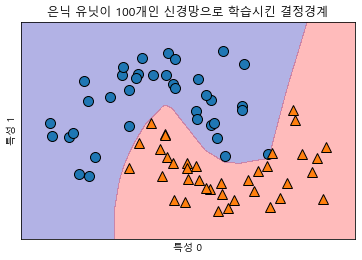

In [72]:
# mlp 파라미터 비교해보기 -> two_moons데이터 이용하기
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import mglearn

# 데이터 불러오기
X,y = make_moons(n_samples=100,noise=0.25,random_state=0)

# 데이터 나누기
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y,random_state=42) # y에 대해 계층추출한다.

# 다층퍼셉트론 모델 적용하기 --> 은닉유닛의 default값은 100이다.
mlp = MLPClassifier(solver='lbfgs',random_state=0).fit(X_train,y_train)

# 평가 점수
print('훈련 정확도 : {:.3f}'.format(mlp.score(X_train,y_train)))
print('테스트 정확도 : {:.3f}'.format(mlp.score(X_test,y_test)))

# 시각화 하기
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.title('은닉 유닛이 100개인 신경망으로 학습시킨 결정경계')
plt.show() 

훈련 정확도 : 0.907
테스트 정확도 : 0.720


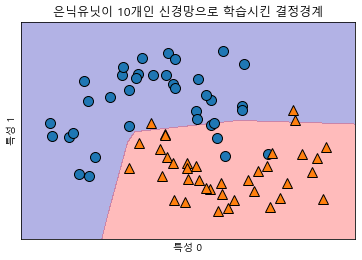

In [73]:
# 은닉유닛이 10개인 신경망으로 학습시킨 결정경계 시각화하기
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10], 
                    max_iter=1000)
mlp.fit(X_train, y_train)

# 평가 점수
print('훈련 정확도 : {:.3f}'.format(mlp.score(X_train,y_train)))
print('테스트 정확도 : {:.3f}'.format(mlp.score(X_test,y_test)))

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.title('은닉유닛이 10개인 신경망으로 학습시킨 결정경계')
plt.show() 

훈련 정확도 : 0.973
테스트 정확도 : 0.800


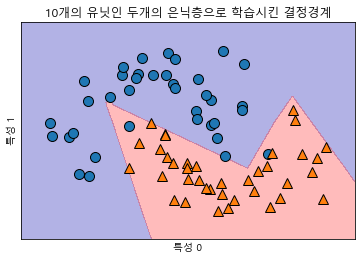

In [74]:
# 10개의 유닛인 두개의 은닉층으로 학습시킨 결정경계 시각화
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10], max_iter=1000)
mlp.fit(X_train, y_train)

# 평가 점수
print('훈련 정확도 : {:.3f}'.format(mlp.score(X_train,y_train)))
print('테스트 정확도 : {:.3f}'.format(mlp.score(X_test,y_test)))

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.title('10개의 유닛인 두개의 은닉층으로 학습시킨 결정경계')
plt.show()

In [ ]:
# 위의 세개의 결과들을 살펴보면 은닉층의 개수가 많아질수록 결정경계가 변동성이 심해지는 것을 알 수 있다.
# 모델이 너무 복잡해지는 것을 막기 위해서는 alpha 파라미터를 이용해 규제를 가할 수 있다.

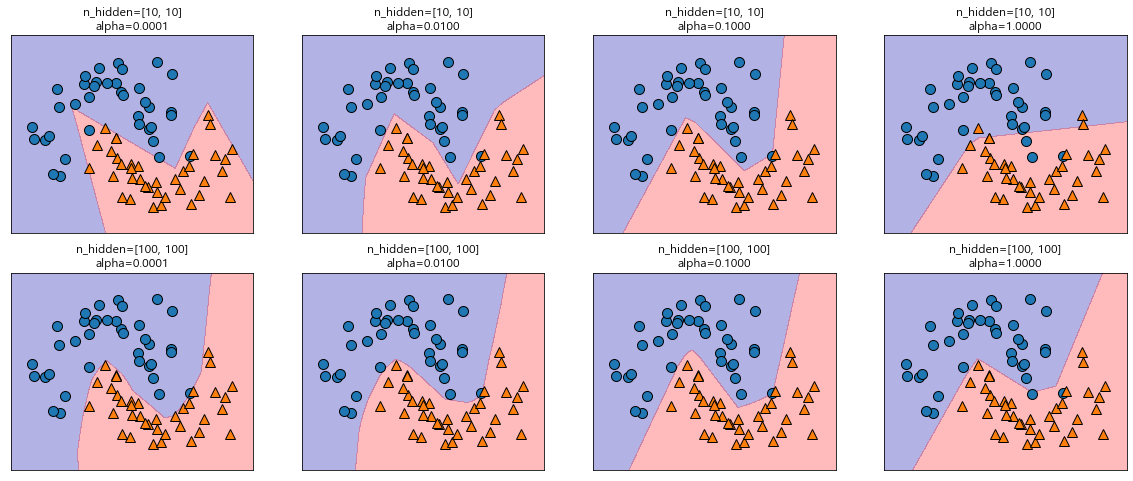

In [68]:
# alpha의 규제를 통해 신경망에 어떻게 영향을 미치는지 확인해보자
# two_moons 데이터를 이용하고 은닉층이 2개이며 각 유닛이 10, 100개인 신경망을 만든다.

fig, axes = plt.subplots(2,4,figsize=(20,8)) # 서브플롯과 크기 설정
for axx,n_hidden_nodes in zip(axes,[10,100]): # 서브플롯 지정과 은닉층의 유닛 개수 설정
    for ax,alpha in zip(axx,[0.0001,0.01,0.1,1]): # alpha값을 0.0001,0.01,0.1,1 로 설정
        
        # 모델 생성 및 학습
        mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[n_hidden_nodes,n_hidden_nodes],alpha=alpha)
        mlp.fit(X_train,y_train)
        
        # 시각화 하기
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

* cancer 데이터를 이용해 다층퍼셉트론 적용해보기

In [83]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# 데이터 생성
cancer = load_breast_cancer()

# 데이터 나누기
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state = 0)

# 신경망도 svm처럼 스케일링을 해주는 것이 좋다. --> standard_scaler를 사용한다. -> 표준정규분포화 한다.
# 라이브러리가 따로 존재하긴 하지만 여기서는 직접 구해서 계산해보자

# 훈련데이터에서 각 특성의 평균
mean_train = X_train.mean(axis=0)
# 훈련데이터에서 각 특성의 표준편차
std_train = X_train.std(axis=0)

# 정규화 -> 데이터 X에서 평균을 빼고 표준편차로 나누어주면 표준정규분포로 변환된다.(평균이 0, 표준편차가 1)
X_train_trans = (X_train - mean_train) / std_train
# 같은 변환을 테스트 데이터도 해준다. --> 주의 : 훈련데이터에서 사용한 평균,표준편차를 그대로 사용한다.
X_test_trans = (X_test - mean_train) / std_train

# 모델 생성 및 학습
mlp = MLPClassifier(random_state=0,max_iter=500).fit(X_train_trans,y_train)

# 모델 평가 하기
# 평가 점수
print('훈련 정확도 : {:.3f}'.format(mlp.score(X_train_trans,y_train)))
print('테스트 정확도 : {:.3f}'.format(mlp.score(X_test_trans,y_test)))

####################################
# 스케일링 작업을 하니 안했을 때보다 모델 성능이 좀더 향상되었음을 확인할 수 있다.
# 하지만 과대적합된 경향을 보이므로 alpha와 같은 규제 파라미터 조정을 통해 과대적합을 해결해야 할 필요성이 보인다.

훈련 정확도 : 1.000
테스트 정확도 : 0.972


In [82]:
# 과대적합을 막기 위해 alpha값을 조정해보자
def change_alpha(alpha):
    # 모델 생성 및 학습
    mlp = MLPClassifier(random_state=0,max_iter=500,alpha=alpha).fit(X_train_trans,y_train)
    
    # 평가 점수
    print('훈련 정확도 : {:.3f}'.format(mlp.score(X_train_trans,y_train)))
    print('테스트 정확도 : {:.3f}'.format(mlp.score(X_test_trans,y_test)))
    
# alpha 지정
alpha = [0.01,0.1,1,10]

# 함수 적용
for regulation in alpha:
    print('alpha : ',regulation)
    change_alpha(regulation)
    
######################################
# alpha값이 커질수록 규제가 강해진다. 즉, 각 특성들의 영향력이 작아진다라는 의미이다.
# 결과를 보면 alpha값 즉, 규제가 강해질수록 모델이 과대적합에서 벗어나고 있다는 것을 확인할 수 있다.

alpha :  0.01
훈련 정확도 : 1.000
테스트 정확도 : 0.972
alpha :  0.1
훈련 정확도 : 0.993
테스트 정확도 : 0.965
alpha :  1
훈련 정확도 : 0.988
테스트 정확도 : 0.972
alpha :  10
훈련 정확도 : 0.958
테스트 정확도 : 0.951


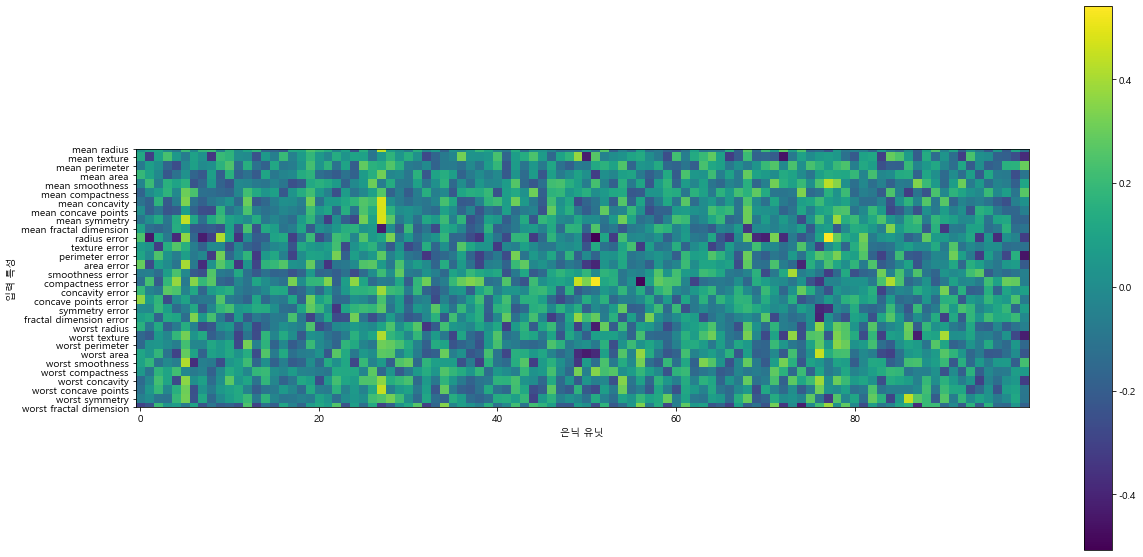

In [93]:
# 모델의 가중치를 시각화시켜 알아보자
plt.figure(figsize=(20,10)) # 그래프 크기 조절
plt.imshow(mlp.coefs_[0],interpolation='none') # mlp.coefs_[0]은 입력층과 첫번째 은닉층 사이의 가중치가 저장되어 있다.
plt.yticks(range(cancer.data.shape[1]),cancer.feature_names) # y축에 cancer 데이터의 특성들을 대입
plt.xlabel('은닉 유닛')
plt.ylabel('입력 특성')
plt.colorbar() # 오른쪽에 컬러바를 표현
plt.show()

#########################
# 색깔이 연할수록 특성의 영향력이 높다고 생각할 수 있다. -> 가중치가 높다.

In [ ]:
# 신경망의 장점과 단점
# 이미지, 음성과 같은 분야에서는 신경망 모델의 성능이 매우 좋다.
# 충분한 시간이 있으면 복잡한 모델을 만들어낼 수 있지만, 학습시키는데 시간이 오래걸린다는 단점이 존재한다.
# 또한, 데이터 전처리에 민감하고 매개변수 튜닝이 어려운 단점이 있다.